### WEATHER PREDICTION

###### importing  libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weather_data.csv', index_col = "DATE")

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


##### Data Preparation & Data Cleaning

In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.655262
ACSH       0.655262
AWND       0.519821
DAPR       0.999528
FMTM       0.870812
FRGT       0.999882
MDPR       0.999528
PGTM       0.497935
PRCP       0.016576
SNOW       0.328693
SNWD       0.321378
TAVG       0.879837
TMAX       0.000531
TMIN       0.000590
TSUN       0.932102
WDF1       0.655262
WDF2       0.519762
WDF5       0.524894
WDFG       0.748289
WSF1       0.655262
WSF2       0.519703
WSF5       0.524894
WSFG       0.748289
WT01       0.779436
WT02       0.980120
WT03       0.992921
WT04       0.999764
WT05       0.998348
WT07       0.999882
WT08       0.810937
WT09       0.999882
WT16       0.884674
WT18       0.999823
dtype: float64

In [8]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [9]:
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [10]:
core_weather.head()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


###### Filling missing Values

In [12]:
#Get the percentage of null values in each column
core_weather.apply(pd.isnull).sum()/weather.shape[0]

precip        0.016576
snow          0.328693
snow_depth    0.321378
temp_max      0.000531
temp_min      0.000590
dtype: float64

In [16]:
#Exploring the data to find usefull columns
core_weather['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [17]:
core_weather['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [18]:
# Since there is no real variation in the categories, we drop the columns
del core_weather['snow_depth']
del core_weather['snow']

In [19]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [20]:
core_weather.loc["1983-10-20": '1983-11-05',:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [21]:
#Judging from the data above we will replace the precipitation data with 0
core_weather['precip'].value_counts()

0.00    13743
0.01      440
0.02      199
0.03      123
0.04      104
        ...  
1.19        1
1.88        1
2.39        1
1.59        1
2.37        1
Name: precip, Length: 176, dtype: int64

In [22]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [23]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [24]:
core_weather = core_weather.fillna(method = 'ffill')

In [28]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [30]:
# Verifying the datatypes
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [31]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30'],
      dtype='object', name='DATE', length=16952)

In [33]:
core_weather.index = pd.to_datetime(core_weather.index)

In [34]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', name='DATE', length=16952, freq=None)

In [35]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16952)

In [36]:
core_weather.apply(lambda x: (x== 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

#### Analyzing the data

<AxesSubplot:xlabel='DATE'>

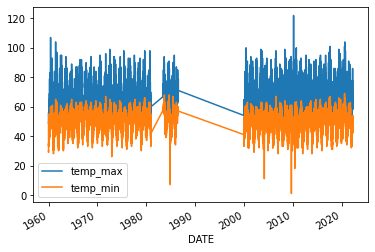

In [37]:
core_weather[['temp_max', 'temp_min']].plot()

In [40]:
# from the data we find out the is missing data in those columns
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    120
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

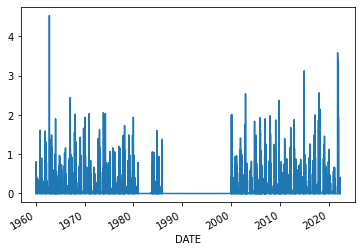

In [41]:
core_weather['precip'].plot()

In [43]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     1.85
Name: precip, dtype: float64

### MACHINE LEARNING MODEL

In [44]:
# We need to predict the maximum temperature, so this will be our target variable

In [45]:
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [47]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-04-26,0.0,63.0,51.0,62.0
2022-04-27,0.0,62.0,48.0,62.0
2022-04-28,0.0,62.0,47.0,68.0


In [48]:
core_weather = core_weather.iloc[:-1, :].copy()

In [49]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-04-25,0.0,67.0,47.0,63.0
2022-04-26,0.0,63.0,51.0,62.0
2022-04-27,0.0,62.0,48.0,62.0


In [50]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)

In [51]:
predictors = ['precip', 'temp_max', 'temp_max']

In [53]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01",:]

In [55]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [56]:
predictions = reg.predict(test[predictors])
from sklearn.metrics import mean_absolute_error

ValueError: Expected 2D array, got 1D array instead:
array=[ 0. 60. 60.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.